In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('etherium.csv')

data

,Time,Close
0,8/8/15,1.19999
1,8/9/15,1.19999
2,8/10/15,1.19999
3,8/11/15,0.99000
4,8/12/15,1.28800
...,...,...
2754,2/21/23,1655.09468
2755,2/22/23,1641.94119
2756,2/23/23,1649.39288
2757,2/24/23,1608.29904


In [16]:
data = data.sort_values(by = 'Time')
data = data.reset_index(drop = True)
data = data.set_index('Time')
data

,Close
Time,
1/1/16,0.920370
1/1/17,8.177852
1/1/18,756.071766
1/1/19,139.154644
1/1/20,129.963875
...,...
9/9/18,195.588832
9/9/19,181.388242
9/9/20,352.053949


In [19]:
import statistics as stat                                           

para=pd.Series(np.arange(1,51,1))
calib =pd.DataFrame(para)                                           
calib.columns =['Para']
calib['Mean'] = ''
calib['Stdev'] = ''
calib['SR'] = ''
calib['Ann_SR'] = ''
calib

pd.options.mode.chained_assignment = None                               # suppress warning..

# for i in range(0, len(calib['Para'])):                                  # k refers to index 0 to 100
for i, j in enumerate(calib['Para']):
    data['Resist']  = data['Close'].shift(1).rolling(window=j).max()    # shift(1) makes rolling window stop at t-1
    data['Support'] = data['Close'].shift(1).rolling(window=j).min()    # replace both 10 with a parameter in a loop

    # data['Signal'] = np.where(data['Diff'] > calib['Para'][k], 1, 0)        # loop thru parameter -50 to 50 
    # data['Order'] = data['Signal'].diff()
    
    data['Order'] = 0
    position = 0

    for k in range(0, len(data['Close'])):
        price = data['Close'][k]
        resist = data['Resist'][k]
        support = data['Support'][k]

        if   price>resist and position==0:             # entering a long position
            data['Order'][k]=1
            position=1
        elif price<resist and position==1:             # exiting a long position (a stop loss)
            data['Order'][k]=-1
            position=0
        elif price<support and position==0:            # entering a short position
            data['Order'][k]=-1
            position=-1
        elif price>support and position==-1:           # exiting a short position (a stop loss)
            data['Order'][k]=1
            position=0
    
    data['Pos_Count'] = data['Order'].cumsum()

    initial_capital = float(5000)
    portfolio = pd.DataFrame(index=data.index)
    portfolio['Position'] = data['Pos_Count'].multiply(data['Close'])
    portfolio['Cash'] = initial_capital - (data['Order'].multiply(data['Close'])).cumsum()
    portfolio['Total'] = portfolio['Position'] + portfolio['Cash']

    portfolio['PnL'] = portfolio['Total']-initial_capital
    portfolio['daily PnL'] = portfolio['PnL'].diff()

    calib['Mean'][i]=stat.mean(portfolio[2:]['daily PnL'])          # note NaN first 2 rows
    calib['Stdev'][i]=stat.stdev(portfolio[2:]['daily PnL'])        # note NaN first 2 rows
    try:
        calib['SR'][i] = calib['Mean'][i]/calib['Stdev'][i]
    except:
        size_to_del = len(calib) - i
        calib.drop(calib.tail(size_to_del).index, inplace = True)
        break
    calib['Ann_SR'][i]=np.sqrt(252)*calib['SR'][i]

    

for i, j in enumerate(calib['Ann_SR']):
    if j == max(calib['Ann_SR']):
        max_ann_sr = calib['Para'][i]
        print('max', i, j, calib['Para'][i])
calib

data['Resist']  = data['Close'].shift(1).rolling(window=max_ann_sr).max()    # shift(1) makes rolling window stop at t-1
data['Support'] = data['Close'].shift(1).rolling(window=max_ann_sr).min()    # replace both 10 with a parameter in a loop

data

max 3 -0.8797186714065918 4


,Close,Resist,Support,Order,Pos_Count
Time,,,,,
1/1/16,0.920370,NaN,NaN,0,0
1/1/17,8.177852,NaN,NaN,0,0
1/1/18,756.071766,NaN,NaN,0,0
1/1/19,139.154644,NaN,NaN,0,0
1/1/20,129.963875,756.071766,0.920370,0,0
...,...,...,...,...,...
9/9/18,195.588832,1634.563880,1.210000,0,0
9/9/19,181.388242,305.233474,1.210000,0,0
9/9/20,352.053949,305.233474,11.660333,0,0


In [30]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('etherium.csv')
df

,Time,Close
0,8/8/15,1.19999
1,8/9/15,1.19999
2,8/10/15,1.19999
3,8/11/15,0.99000
4,8/12/15,1.28800
...,...,...
2754,2/21/23,1655.09468
2755,2/22/23,1641.94119
2756,2/23/23,1649.39288
2757,2/24/23,1608.29904


In [32]:
df['Time'] = pd.to_datetime(data['Time'])
df = df.sort_values(by = 'Time')
df = df.reset_index(drop = True)
df = df.set_index('Time')
df

,Close
Time,
2015-08-08,1.19999
2015-08-09,1.19999
2015-08-10,1.19999
2015-08-11,0.99000
2015-08-12,1.28800
...,...
2023-02-21,1655.09468
2023-02-22,1641.94119
2023-02-23,1649.39288


In [33]:
df['Diff'] = df['Close'].diff()

# df['Signal'] = np.where(df['Diff'] > 0, 1, 0)
# df['Order'] = df['Signal'].diff()
# df['Pos_Count'] = df['Order'].cumsum()

df

,Close,Diff
Time,,
2015-08-08,1.19999,NaN
2015-08-09,1.19999,0.00000
2015-08-10,1.19999,0.00000
2015-08-11,0.99000,-0.20999
2015-08-12,1.28800,0.29800
...,...,...
2023-02-21,1655.09468,-45.79019
2023-02-22,1641.94119,-13.15349
2023-02-23,1649.39288,7.45169


In [34]:
import statistics as stat                                           

para=pd.Series(np.arange(-5,6.1,.1))
calib =pd.DataFrame(para)                                           
calib.columns =['Para']
calib['Mean'] = ''
calib['Stdev'] = ''
calib['SR'] = ''
calib['Ann_SR'] = ''
calib

,Para,Mean,Stdev,SR,Ann_SR
0,-5.0,,,,
1,-4.9,,,,
2,-4.8,,,,
3,-4.7,,,,
4,-4.6,,,,
...,...,...,...,...,...
106,5.6,,,,
107,5.7,,,,
108,5.8,,,,
109,5.9,,,,


In [40]:
pd.options.mode.chained_assignment = None                               # suppress warning..

for k in range(0, len(calib['Para'])):                                  # k refers to index 0 to 100
    df['Signal'] = np.where(df['Diff'] > calib['Para'][k], 1, 0)        # loop thru parameter -50 to 50 
    df['Order'] = df['Signal'].diff()
    df['Pos_Count'] = df['Order'].cumsum()

    initial_capital = float(5000)
    portfolio = pd.DataFrame(index=df.index)
    portfolio['Position'] = df['Pos_Count'].multiply(df['Close'])
    portfolio['Cash'] = initial_capital - (df['Order'].multiply(df['Close'])).cumsum()
    portfolio['Total'] = portfolio['Position'] + portfolio['Cash']

    portfolio['PnL'] = portfolio['Total']-initial_capital
    portfolio['daily PnL'] = portfolio['PnL'].diff()

    calib['Mean'][k]=stat.mean(portfolio[2:]['daily PnL'])          # note NaN first 2 rows
    calib['Stdev'][k]=stat.stdev(portfolio[2:]['daily PnL'])        # note NaN first 2 rows
    try:
        calib['SR'][k] = calib['Mean'][k]/calib['Stdev'][k]
    except:
        size_to_del = len(calib) - k
        calib.drop(calib.tail(size_to_del).index, inplace = True)
        break
    calib['Ann_SR'][k]=np.sqrt(252)*calib['SR'][k]

max_val = 0
    
for i, j in enumerate(calib['Ann_SR']):
    if j == max(calib['Ann_SR']):
        print('max', i, j, calib['Para'][i])
        max_val = calib['Para'][i]
        

df['Signal'] = np.where(df['Diff'] > calib['Para'][i], 1, 0)
df['Order'] = df['Signal'].diff()
df['Pos_Count'] = df['Order'].cumsum()
        
        
calib

max 23 0.20956540499185153 -2.700000000000008


,Para,Mean,Stdev,SR,Ann_SR
0,-5.0,0.432376,46.093362,0.00938,0.14891
1,-4.9,0.457311,46.086779,0.009923,0.15752
2,-4.8,0.458906,46.086354,0.009958,0.158071
3,-4.7,0.46008,46.086201,0.009983,0.158476
4,-4.6,0.467404,46.083171,0.010143,0.161009
...,...,...,...,...,...
106,5.6,0.052375,43.749342,0.001197,0.019004
107,5.7,0.050416,43.747762,0.001152,0.018294
108,5.8,0.061005,43.745615,0.001395,0.022138
109,5.9,0.068111,43.743691,0.001557,0.024717


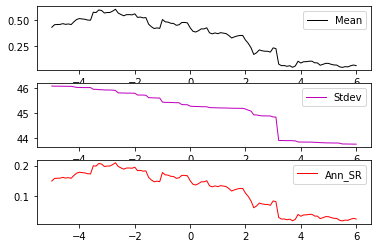

In [41]:
fig5, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.plot(calib['Para'],calib['Mean'], color='k', lw=1, label='Mean')
ax2.plot(calib['Para'],calib['Stdev'], color='m', lw=1, label='Stdev')
ax3.plot(calib['Para'],calib['Ann_SR'], color='r', lw=1, label='Ann_SR')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
plt.show()

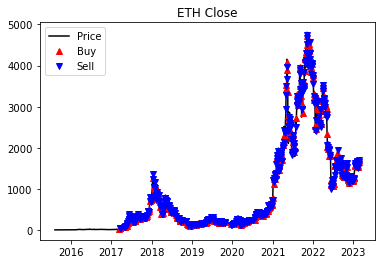

In [42]:
fig1, ax1 = plt.subplots()
ax1.plot(df['Close'], color = 'k', label = 'Price')
ax1.plot(df.loc[df.Order == 1].index, df.Close[df.Order == 1],'^',color='r',label='Buy')
ax1.plot(df.loc[df.Order == -1].index, df.Close[df.Order == -1],'v',color='b',label='Sell')
plt.legend(loc='upper left')
plt.title('ETH Close')
plt.show()

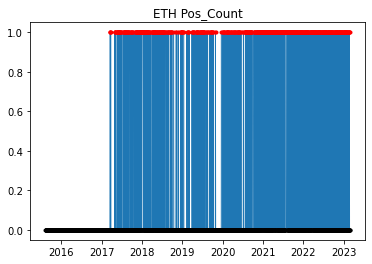

In [43]:
fig2, ax2 = plt.subplots()
ax2.plot(df.Pos_Count, lw=0.5)
ax2.plot(df.loc[df.Pos_Count == 0].index, df.Pos_Count[df.Pos_Count == 0], '.', color='k')
ax2.plot(df.loc[df.Pos_Count >  0].index, df.Pos_Count[df.Pos_Count >  0], '.', color='r')
ax2.plot(df.loc[df.Pos_Count <  0].index, df.Pos_Count[df.Pos_Count <  0], '.', color='b')
plt.title('ETH Pos_Count')
plt.show()

In [45]:
initial_capital = float(2000)
portfolio = pd.DataFrame(index = df.index)
portfolio['Position'] = df['Pos_Count'].multiply(df['Close'])
portfolio['Cash'] = initial_capital - (df['Order'].multiply(df['Close'])).cumsum()
portfolio['Total'] = portfolio['Position'] + portfolio['Cash']

portfolio

,Position,Cash,Total
Time,,,
2015-08-08,NaN,NaN,NaN
2015-08-09,0.00000,2000.00000,2000.00000
2015-08-10,0.00000,2000.00000,2000.00000
2015-08-11,0.00000,2000.00000,2000.00000
2015-08-12,0.00000,2000.00000,2000.00000
...,...,...,...
2023-02-21,0.00000,2213.43330,2213.43330
2023-02-22,0.00000,2213.43330,2213.43330
2023-02-23,1649.39288,564.04042,2213.43330


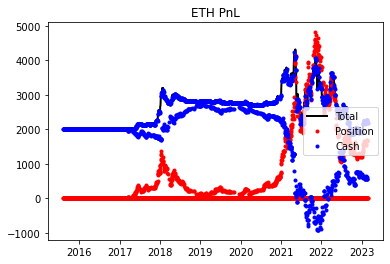

In [46]:
fig3, ax3 = plt.subplots()
ax3.plot(portfolio['Total'], color='k', lw=2, label='Total')
ax3.plot(portfolio['Position'],'.', color='r', label='Position')
ax3.plot(portfolio['Cash'],'.', color='b', label='Cash')
plt.legend(loc='center right')
plt.title('ETH PnL')
plt.show()

In [48]:
portfolio['PnL'] = portfolio['Total']-initial_capital
initial_price=df.iloc[0,0]
portfolio['BnH'] = df['Close']-initial_price

portfolio

,Position,Cash,Total,PnL,BnH
Time,,,,,
2015-08-08,NaN,NaN,NaN,NaN,0.00000
2015-08-09,0.00000,2000.00000,2000.00000,0.00000,0.00000
2015-08-10,0.00000,2000.00000,2000.00000,0.00000,0.00000
2015-08-11,0.00000,2000.00000,2000.00000,0.00000,-0.20999
2015-08-12,0.00000,2000.00000,2000.00000,0.00000,0.08801
...,...,...,...,...,...
2023-02-21,0.00000,2213.43330,2213.43330,213.43330,1653.89469
2023-02-22,0.00000,2213.43330,2213.43330,213.43330,1640.74120
2023-02-23,1649.39288,564.04042,2213.43330,213.43330,1648.19289


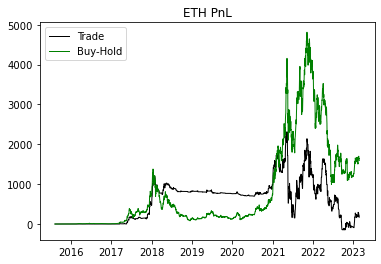

In [49]:
fig4, ax4 = plt.subplots()
ax4.plot(portfolio['PnL'], color='k', lw=1, label='Trade')
ax4.plot(portfolio['BnH'], color='g', lw=1, label='Buy-Hold')
plt.legend(loc='upper left')
plt.title('ETH PnL')
plt.show()

In [50]:
portfolio['daily PnL'] = portfolio['PnL'].diff()
portfolio['daily BnH'] = portfolio['BnH'].diff()

portfolio

,Position,Cash,Total,PnL,BnH,daily PnL,daily BnH
Time,,,,,,,
2015-08-08,NaN,NaN,NaN,NaN,0.00000,NaN,NaN
2015-08-09,0.00000,2000.00000,2000.00000,0.00000,0.00000,NaN,0.00000
2015-08-10,0.00000,2000.00000,2000.00000,0.00000,0.00000,0.00000,0.00000
2015-08-11,0.00000,2000.00000,2000.00000,0.00000,-0.20999,0.00000,-0.20999
2015-08-12,0.00000,2000.00000,2000.00000,0.00000,0.08801,0.00000,0.29800
...,...,...,...,...,...,...,...
2023-02-21,0.00000,2213.43330,2213.43330,213.43330,1653.89469,-45.79019,-45.79019
2023-02-22,0.00000,2213.43330,2213.43330,213.43330,1640.74120,0.00000,-13.15349
2023-02-23,1649.39288,564.04042,2213.43330,213.43330,1648.19289,0.00000,7.45169


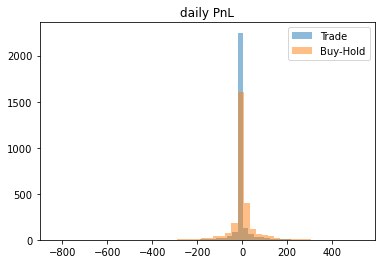

In [51]:
plt.hist(portfolio['daily PnL'], 50, alpha=0.5, label='Trade')
plt.hist(portfolio['daily BnH'], 50, alpha=0.5, label='Buy-Hold')
plt.legend(loc='upper right')
plt.title('daily PnL')
plt.show()

In [52]:
import statistics as stat
m = stat.mean(portfolio[2:]['daily PnL'])
s = stat.stdev(portfolio[2:]['daily PnL'])
SR = m/s
AnnSR = np.sqrt(252)*SR
print('Trade:', m, s, SR, AnnSR)

m2 = stat.mean(portfolio[2:]['daily BnH'])
s2 = stat.stdev(portfolio[2:]['daily BnH'])
SR2 = m2/s2
AnnSR2 = np.sqrt(252)*SR2
print('Buy-Hold:', m2, s2, SR2, AnnSR2)

# good stategy is sharpe ratio of 5-10+

Trade: 0.06250977859992805 43.742710886867016 0.0014290330281906585 0.02268519604734022
Buy-Hold: 0.5776945701849836 64.71336859448907 0.008926974174454884 0.1417113217554225
